In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
customer_attr = pd.read_csv("customer_data_2014-15_attr.csv")
customer_visits = pd.read_csv('customer_data_2015_visited.csv')
customer_transactions = pd.read_csv('customer_data3_2015_transactions.csv')

In [103]:
print(customer_attr.shape)
print(customer_attr.head())
print(customer_attr['CustomerId'].nunique())

(500000, 5)
   CustomerId  Age CustomerSince Gender Region
0      500001   59          2012      F   East
1      500002   26          2013      M   East
2      500003   28          2013      F   West
3      500004   31          2015      M   West
4      500005   28          2013      F  South
500000


In [104]:
print(customer_visits.head())
print(customer_visits.shape)
print(customer_visits['CustomerID'].nunique())

   CustomerID  Visits
0      500001      36
1      500002      32
2      500003      43
3      500004      33
4      500005      42
(500000, 2)
500000


In [105]:
print(customer_transactions.head())
print(customer_transactions.shape)
print(customer_transactions['CustomerID'].nunique())

   transactionID  Spends  CustomerID transactionDate
0        1000001      16      843140      2015-01-01
1        1000002      31      697698      2015-01-01
2        1000003      27      746282      2015-01-01
3        1000004      28      645145      2015-01-01
4        1000005      22      766577      2015-01-01
(2844432, 4)
437323


In [106]:
#There is a difference in unique customer count for transactions_data(count = 437323) and visists data (count = 500000)

In [107]:
#Merging customer attributes and visits
customer_attr = customer_attr.rename(columns = {'CustomerId':'CustomerID'})
init_result = pd.merge(customer_attr, customer_visits, on='CustomerID')
init_result.head()

,CustomerID,Age,CustomerSince,Gender,Region,Visits
0,500001,59,2012,F,East,36
1,500002,26,2013,M,East,32
2,500003,28,2013,F,West,43
3,500004,31,2015,M,West,33
4,500005,28,2013,F,South,42


In [108]:
#Tuning transactions data

#Converting transactionDate 
customer_transactions['transactionDate'] = pd.to_datetime(customer_transactions['transactionDate'])
customer_transactions.head()

,transactionID,Spends,CustomerID,transactionDate
0,1000001,16,843140,2015-01-01
1,1000002,31,697698,2015-01-01
2,1000003,27,746282,2015-01-01
3,1000004,28,645145,2015-01-01
4,1000005,22,766577,2015-01-01


In [109]:
customer_transactions['transactionMonth'] = customer_transactions['transactionDate'].dt.month

In [110]:
customer_transactions.head()
group_month = customer_transactions.groupby(['transactionMonth']).sum()
group_month = group_month.drop(['CustomerID', 'transactionID'], axis = 'columns')
group_month

#.hist(group_month['transactionMonth'].values)

,Spends
transactionMonth,
1,4532827
2,4107854
3,4540540
4,4388463
5,4531023
6,11300273
7,4513619
8,4541741
9,4386490


In [111]:
customer_transactions.head()

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,1
1,1000002,31,697698,2015-01-01,1
2,1000003,27,746282,2015-01-01,1
3,1000004,28,645145,2015-01-01,1
4,1000005,22,766577,2015-01-01,1


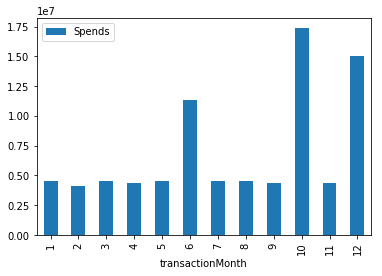

In [112]:
group_month.plot(kind='bar')

In [113]:
#From this histogram we assume that monts (6, 10, 12) are offer months
customer_transactions.head()

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,1
1,1000002,31,697698,2015-01-01,1
2,1000003,27,746282,2015-01-01,1
3,1000004,28,645145,2015-01-01,1
4,1000005,22,766577,2015-01-01,1


In [114]:
print(customer_transactions.dtypes)
temp_ct = pd.DataFrame(customer_transactions).copy()
temp_ct.head()

transactionID                int64
Spends                       int64
CustomerID                   int64
transactionDate     datetime64[ns]
transactionMonth             int64
dtype: object


,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,1
1,1000002,31,697698,2015-01-01,1
2,1000003,27,746282,2015-01-01,1
3,1000004,28,645145,2015-01-01,1
4,1000005,22,766577,2015-01-01,1


In [115]:
# def offer_status(df, column):    
#     for index, row in df.iterrows():
#         df['offer_month_status'] = ((row[column] == 6) | (row[column] == 10) |(row[column] == 12))
        
# temp_ct.head()

offer_list = [6, 10, 12]

def offer_status(df, column):
    for i in range(1,13):
        if i in offer_list:
            temp_ct['transactionMonth'][temp_ct['transactionMonth'] == i] = 'Offer_Month'
        else:
            temp_ct['transactionMonth'][temp_ct['transactionMonth'] == i] = 'Non_Offer_Month'

In [116]:
offer_status(temp_ct, 'transactionMonth')

/Users/aletisi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [117]:
temp_ct.head()

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,Non_Offer_Month
1,1000002,31,697698,2015-01-01,Non_Offer_Month
2,1000003,27,746282,2015-01-01,Non_Offer_Month
3,1000004,28,645145,2015-01-01,Non_Offer_Month
4,1000005,22,766577,2015-01-01,Non_Offer_Month


In [118]:
# print(temp_ct['CustomerID'].value_counts())
temp_ct[temp_ct['CustomerID']==502005]

,transactionID,Spends,CustomerID,transactionDate,transactionMonth
2080382,3080383,88,502005,2015-10-10,Offer_Month


In [119]:
#Fetching offer month values
offer_df = temp_ct.groupby(['transactionMonth']).get_group('Offer_Month')
#offer_df = pd.DataFrame(offer_df).copy()

In [120]:
print(customer_transactions['CustomerID'].nunique())
print(offer_df['CustomerID'].nunique())
print(customer_transactions['CustomerID'].nunique()-offer_df['CustomerID'].nunique())
print(offer_df.shape)
offer_df.head()
#number of unique customers in offer months 
#difference of customers on offer and non offer months

437323
382329
54994
(1485350, 5)


,transactionID,Spends,CustomerID,transactionDate,transactionMonth
752080,1752081,31,769007,2015-06-01,Offer_Month
752081,1752082,30,610399,2015-06-01,Offer_Month
752082,1752083,33,776101,2015-06-01,Offer_Month
752083,1752084,31,864267,2015-06-01,Offer_Month
752084,1752085,30,800585,2015-06-01,Offer_Month


In [121]:
off_cond = init_result['CustomerID'].isin(offer_df['CustomerID'])
# y = offer_df[offer_df['transactionID'] == offer_df_avg['lastTransID'] ]

off_x = init_result[off_cond].copy()

#Customers attribute table - who purchased in offer month
off_x.shape
#off_x.head()

#getting the customer Ids of customers on offer months

(382329, 6)

In [122]:
#Fetching non-offer month values
nonOff_df = temp_ct.groupby(['transactionMonth']).get_group('Non_Offer_Month')
nonOff_df = pd.DataFrame(nonOff_df).copy()

In [123]:
print(customer_transactions['CustomerID'].nunique())
print(nonOff_df['CustomerID'].nunique())
print(nonOff_df.shape)
nonOff_df.head()

437323
374840
(1359082, 5)


,transactionID,Spends,CustomerID,transactionDate,transactionMonth
0,1000001,16,843140,2015-01-01,Non_Offer_Month
1,1000002,31,697698,2015-01-01,Non_Offer_Month
2,1000003,27,746282,2015-01-01,Non_Offer_Month
3,1000004,28,645145,2015-01-01,Non_Offer_Month
4,1000005,22,766577,2015-01-01,Non_Offer_Month


In [124]:
#Making a copy of all transactions happend in offer months
offer_df_copy = offer_df.copy()

#Fetching last transactions of all customers
offer_df_latest = offer_df.groupby(['CustomerID'])['transactionID'].max()
# offer_df_avg = offer_df.loc[offer_df.reset_index().groupby(['CustomerID'])['transactionID'].idxmax()]
offer_df_latest
offer_df_latest = pd.DataFrame(offer_df_latest).copy()
offer_df_latest = offer_df_latest.sort_index()
offer_df_latest = offer_df_latest.rename(columns={'transactionID':'lastTransID'})
offer_df_latest['CustomerID'] = offer_df_latest.index
print(offer_df_latest['CustomerID'].nunique())
print(offer_df_latest.shape)
print(offer_df_copy.shape)
offer_df_latest.head()


382329
(382329, 2)
(1485350, 5)


,lastTransID,CustomerID
CustomerID,,
500001,3754483,500001
500002,3593302,500002
500004,3791230,500004
500006,3691650,500006
500009,3830338,500009


In [125]:
#Checking last transaction in whole transactions of offer-month
cond = offer_df['transactionID'].isin(offer_df_latest['lastTransID'])

#Saving entire row of customer last transaction into 'y'
y = offer_df[cond]

#Droping last transaction rows from entire offer-month transactions
offer_df.drop(offer_df[cond].index, inplace = True)

offer_df.head()

/Users/aletisi/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,transactionID,Spends,CustomerID,transactionDate,transactionMonth
752080,1752081,31,769007,2015-06-01,Offer_Month
752081,1752082,30,610399,2015-06-01,Offer_Month
752082,1752083,33,776101,2015-06-01,Offer_Month
752083,1752084,31,864267,2015-06-01,Offer_Month
752084,1752085,30,800585,2015-06-01,Offer_Month


In [126]:
offer_df.shape

(1103021, 5)

In [127]:
#maximum spends of each customer after deleting last-transaction
temp_off_df_max = offer_df.groupby(['CustomerID'])['Spends'].max()
temp_off_df_max = pd.DataFrame(temp_off_df_max).copy()
temp_off_df_max = temp_off_df_max.sort_index()
temp_off_df_max = temp_off_df_max.rename(columns={'Spends':'Max_Spendings'})
temp_off_df_max['CustomerID'] = temp_off_df_max.index
temp_off_df_max.head()

,Max_Spendings,CustomerID
CustomerID,,
500001,40,500001
500002,31,500002
500004,33,500004
500009,31,500009
500010,34,500010


In [128]:
#minimum spends of each customer after deleting last-transaction
temp_off_df_min = offer_df.groupby(['CustomerID'])['Spends'].min()
temp_off_df_min = pd.DataFrame(temp_off_df_min).copy()
temp_off_df_min = temp_off_df_min.sort_index()
temp_off_df_min = temp_off_df_min.rename(columns={'Spends':'Min_Spendings'})
temp_off_df_min['CustomerID'] = temp_off_df_min.index
temp_off_df_min.head()

,Min_Spendings,CustomerID
CustomerID,,
500001,39,500001
500002,21,500002
500004,20,500004
500009,30,500009
500010,17,500010


In [129]:
#Averaging spends of each customer after deleting last-transaction
temp_off_df = offer_df.groupby(['CustomerID'])['Spends'].mean()
temp_off_df = pd.DataFrame(temp_off_df).copy()
temp_off_df = temp_off_df.sort_index()
temp_off_df = temp_off_df.rename(columns={'Spends':'Avg_Spendings'})
temp_off_df['CustomerID'] = temp_off_df.index
temp_off_df.head()

,Avg_Spendings,CustomerID
CustomerID,,
500001,39.500000,500001
500002,26.333333,500002
500004,29.200000,500004
500009,30.333333,500009
500010,23.666667,500010


In [130]:
#sum spends of each customer after deleting last-transaction
temp_off_df_sum = offer_df.groupby(['CustomerID'])['Spends'].sum()
temp_off_df_sum = pd.DataFrame(temp_off_df_sum).copy()
temp_off_df_sum = temp_off_df_sum.sort_index()
temp_off_df_sum = temp_off_df_sum.rename(columns={'Spends':'Total_Spendings'})
temp_off_df_sum['CustomerID'] = temp_off_df_sum.index
temp_off_df_sum.head()

,Total_Spendings,CustomerID
CustomerID,,
500001,79,500001
500002,158,500002
500004,146,500004
500009,91,500009
500010,142,500010


In [131]:
#total number of transactions spends of each customer after deleting last-transaction
temp_off_df_total_trans = offer_df.groupby(['CustomerID']).count()
temp_off_df_total_trans = pd.DataFrame(temp_off_df_total_trans).copy()
temp_off_df_total_trans = temp_off_df_total_trans.sort_index()
temp_off_df_total_trans = temp_off_df_total_trans.rename(columns={'transactionID':'Total_Transactions'})
temp_off_df_total_trans['CustomerID'] = temp_off_df_total_trans.index
temp_off_df_total_trans.head()

,Total_Transactions,Spends,transactionDate,transactionMonth,CustomerID
CustomerID,,,,,
500001,2,2,2,2,500001
500002,6,6,6,6,500002
500004,5,5,5,5,500004
500009,3,3,3,3,500009
500010,6,6,6,6,500010


In [132]:
#off_x is consolidated dataframe of customer(attr, visits, offermonth-trans)
#temp_off_df is average spendings of all customers excluding last-transcation
#Joining off_x and temp_off_x 
#temp_off_df is a dataframe with avg.spending of unique customers who purchased in offer-month 
temp_off_df = off_x.join(temp_off_df.set_index('CustomerID'), on='CustomerID')

#Appending value 0 for customers who did 1 transaction
print(temp_off_df['Avg_Spendings'].mean())
temp_off_df['Avg_Spendings'] = temp_off_df['Avg_Spendings'].fillna(temp_off_df['Avg_Spendings'].mean())
temp_off_df

28.7937513223878


,CustomerID,Age,CustomerSince,Gender,Region,Visits,Avg_Spendings
0,500001,59,2012,F,East,36,39.500000
1,500002,26,2013,M,East,32,26.333333
3,500004,31,2015,M,West,33,29.200000
5,500006,58,2015,M,West,35,28.793751
8,500009,36,2013,M,West,31,30.333333
9,500010,25,2012,F,East,29,23.666667
10,500011,33,2015,M,East,37,24.666667
11,500012,57,2012,M,West,31,47.000000
12,500013,55,2012,F,West,19,31.000000
13,500014,56,<2011,F,West,35,32.000000


In [133]:
off_x

,CustomerID,Age,CustomerSince,Gender,Region,Visits
0,500001,59,2012,F,East,36
1,500002,26,2013,M,East,32
3,500004,31,2015,M,West,33
5,500006,58,2015,M,West,35
8,500009,36,2013,M,West,31
9,500010,25,2012,F,East,29
10,500011,33,2015,M,East,37
11,500012,57,2012,M,West,31
12,500013,55,2012,F,West,19
13,500014,56,<2011,F,West,35


In [134]:
print(f'temp_off_df shape {temp_off_df.shape}')
print(f'y shape {y.shape}')
#y.head()



temp_off_df shape (382329, 7)
y shape (382329, 5)


In [135]:
off_spend_pred = (y[['CustomerID', 'Spends']])
off_spend_pred.head()
# y.head()

,CustomerID,Spends
752112,983734,88
752123,717744,31
752142,942794,103
752158,528543,75
752159,757247,108


In [136]:
temp_off_df = temp_off_df.join(off_spend_pred.set_index('CustomerID'), on='CustomerID')
temp_off_df = temp_off_df.rename(columns={'Spends':'Exp_Spend'})
temp_off_df.shape

(382329, 8)

In [137]:
temp_off_df.head()

,CustomerID,Age,CustomerSince,Gender,Region,Visits,Avg_Spendings,Exp_Spend
0,500001,59,2012,F,East,36,39.500000,31
1,500002,26,2013,M,East,32,26.333333,19
3,500004,31,2015,M,West,33,29.200000,33
5,500006,58,2015,M,West,35,28.793751,49
8,500009,36,2013,M,West,31,30.333333,30


In [138]:
#Converting categorical data
def encode(column, dataframe):
    one_hot = pd.get_dummies(dataframe[column])
    dataframe = dataframe.drop(column,axis = 1)
    dataframe = dataframe.join(one_hot)
    return dataframe

In [139]:
temp_off_df = encode('Gender', temp_off_df)
temp_off_df = encode('Region', temp_off_df)


In [140]:
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '<2011'] = 5
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2015'] = 1
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2014'] = 2
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2013'] = 3
temp_off_df['CustomerSince'][temp_off_df['CustomerSince'] == '2012'] = 4

/Users/aletisi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/aletisi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/aletisi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imp

In [74]:
#Separating independent and dependent variable from offer-month dataframe(temp_off_df)
X_off = temp_off_df.drop(['CustomerID', 'Exp_Spend'], axis = 1).values
Y_off = temp_off_df['Exp_Spend'].values

In [75]:
X_off

array([[59, 4, 36, ..., 0, 0, 0],
       [26, 3, 32, ..., 0, 0, 0],
       [31, 1, 33, ..., 0, 0, 1],
       ...,
       [56, 5, 30, ..., 0, 0, 0],
       [59, 1, 23, ..., 0, 0, 1],
       [40, 1, 29, ..., 0, 1, 0]], dtype=object)

In [76]:
#Splitting test and train data for offer-month dataframe
from sklearn.model_selection import train_test_split
X_off_train, X_off_test, y_off_train, y_off_test = train_test_split(X_off, Y_off, test_size=0.1, random_state=42)

In [77]:
#Implementing feature_scaling for independent variables
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_off = sc_X.fit_transform(X_off_train)
# independent_test = sc_X.transform(independent_test)

In [78]:
#Applying Multiple Linear Regression 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_off_train, y_off_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
#predicting values for X test data
y_off_pred = regressor.predict(X_off_test)

In [81]:
#Checking accuracy
# from sklearn.metrics import accuracy_score
# accuracy_score(X_off_test, y_off_pred)
from sklearn.metrics import mean_squared_error 
mean_squared_error(y_off_test, y_off_pred)

301.08952677169725

In [82]:
X_off

array([[59, 4, 36, ..., 0, 0, 0],
       [26, 3, 32, ..., 0, 0, 0],
       [31, 1, 33, ..., 0, 0, 1],
       ...,
       [56, 5, 30, ..., 0, 0, 0],
       [59, 1, 23, ..., 0, 0, 1],
       [40, 1, 29, ..., 0, 1, 0]], dtype=object)

In [83]:
#Building optimal Backward Elimination
#Adding X0 = 1, by creating a new column for X
X_off = np.append(arr = np.ones((382329, 1)).astype(int), values = X_off, axis =1)
X_Opt_off = X_off[:, [0, 1, 2, 3, 4]]
X_Opt_off = np.array(X_Opt_off, dtype=float)

In [84]:
#fitting backward elimination step1 to regressor
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y_off, exog = X_Opt_off).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                 3.045e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:            -1.6393e+06
No. Observations:              382329   AIC:                         3.279e+06
Df Residuals:                  382324   BIC:                         3.279e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.7910      0.322    -70.706      0.000     -23.423     -22.159
x1            -0.3046      0.003   -107.395      0.000      -0.310      -0.299
x2             0.9286      0.021     44.669      0.000       0.888       0.969
x3             1.1652      0.007    159.283      0.000       1.151       1.180
x4             1.0528      0.005    212.402      0.000       1.043       1.062
==============================================================================
Omnibus:                    98118.365   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           229993.899
Skew:                           1.449   Prob(JB):                         0.00
Kurtosis:                       5.457   Cond. No.                         656.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
X_Opt_off = X_off[:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]
X_Opt_off = np.array(X_Opt_off, dtype=float)
#fitting backward elimination step1 to regressor
import statsmodels.api as sm
regressor_OLS = sm.OLS(endog = Y_off, exog = X_Opt_off).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                 1.722e+04
Date:                Tue, 24 Mar 2020   Prob (F-statistic):               0.00
Time:                        15:20:32   Log-Likelihood:            -1.6398e+06
No. Observations:              382329   AIC:                         3.280e+06
Df Residuals:                  382321   BIC:                         3.280e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -22.0757      0.146   -150.955      0.000     -22.362     -21.789
x1             0.8735      0.021     41.960      0.000       0.833       0.914
x2             1.4914      0.006    249.914      0.000       1.480       1.503
x3             0.8676      0.005    184.795      0.000       0.858       0.877
x4           -11.4088      0.078   -146.234      0.000     -11.562     -11.256
x5           -10.6669      0.079   -134.878      0.000     -10.822     -10.512
x6            -8.0846      0.055   -147.205      0.000      -8.192      -7.977
x7            -2.5704      0.072    -35.666      0.000      -2.712      -2.429
x8            -2.3334      0.068    -34.236      0.000      -2.467      -2.200
x9            -9.0873      0.056   -162.187      0.000      -9.197      -8.977
==============================================================================
Omnibus:                   106679.619   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           268789.461
Skew:                           1.540   Prob(JB):                         0.00
Kurtosis:                       5.718   Cond. No.                     3.66e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.51e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""